In [1]:
#Importing packages.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from datetime import datetime
from datetime_truncate import truncate
from dateutil import parser

%matplotlib inline


In [2]:
# I downloaded the data locally to use in my python notebook
order_main = pd.read_csv('/Users/crystalrood/desktop/brazilian-ecommerce/olist_orders_dataset.csv')
products_in_order = pd.read_csv('/Users/crystalrood/desktop/brazilian-ecommerce/olist_order_items_dataset.csv')
order_payments = pd.read_csv('/Users/crystalrood/desktop/brazilian-ecommerce/olist_order_payments_dataset.csv')
product_info = pd.read_csv('/Users/crystalrood/desktop/brazilian-ecommerce/olist_products_dataset.csv')
category_translated = pd.read_csv('/Users/crystalrood/desktop/brazilian-ecommerce/product_category_name_translation.csv')
order_reviews = pd.read_csv('/Users/crystalrood/desktop/brazilian-ecommerce/olist_order_reviews_dataset.csv')
customer_info = pd.read_csv('/Users/crystalrood/desktop/brazilian-ecommerce/olist_customers_dataset.csv')

# Taking a look at the data

### order_main dataframe schema and summary

In [3]:
order_main.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [4]:
max_time = order_main.order_purchase_timestamp.max()
min_time = order_main.order_purchase_timestamp.min()
number_records = str(len(order_main))
num_unique_orders = str(order_main['order_id'].nunique())
num_unique_customers = str(order_main['customer_id'].nunique())

print("Latest timestamp: "+ max_time)
print("First timestamp: "+ min_time)
print("Total number of records: "+ number_records)
print("Unique orders: "+ num_unique_orders)
print("Unique customers: "+ num_unique_customers)

Latest timestamp: 2018-10-17 17:30:18
First timestamp: 2016-09-04 21:15:19
Total number of records: 99441
Unique orders: 99441
Unique customers: 99441


### customer_info dataframe schema and summary

In [5]:
customer_info.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [6]:
number_records = str(len(customer_info))
num_customer_ids = str(customer_info['customer_id'].nunique())
num_unique_customers = str(customer_info['customer_unique_id'].nunique())

print("Total number of records: "+ number_records)
print("Number of unique customer_ids: "+ num_customer_ids)
print("Unique customer_ids: "+ num_unique_customers)

Total number of records: 99441
Number of unique customer_ids: 99441
Unique customer_ids: 96096


## joining order_main onto customer_info, order_reviews, and onto order_payments and calculating order total
<p>all 3 of these dataframes give me: unique customers, purchase price, order id</p>

In [7]:
order_customer_info = order_main.merge(customer_info, how='left', on="customer_id")
order_customer_review_info = order_customer_info.merge(order_reviews, how='left', on="order_id")
all_order_info = order_customer_review_info.merge(order_payments, how='left', on="order_id")

all_order_info.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2.0,voucher,1.0,18.59


In [8]:
# aggregating payment_value to get the order total and merging it back onto the main dataframe
order_total =  all_order_info.groupby('order_id').agg({'payment_value':'sum'}).reset_index()
order_total.columns = ['order_id', 'total_order_value']
all_order_info = all_order_info.merge(order_total, how='left', on="order_id")
all_order_info.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,total_order_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12,38.71
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3.0,voucher,1.0,2.00,38.71
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2.0,voucher,1.0,18.59,38.71


##  
## Getting revenue and order volume data for Slide #3
<p> Note that I'll be excluding data before 2017-01 and after 2018-08 in the google sheet</p>

In [9]:
# converting day object to a timestamp so we can truncate to the day 
# (rather than having all the trailing hours + minutes)
all_order_info['order_purchase_timestamp_day'] = pd.to_datetime(all_order_info['order_purchase_timestamp'],\
                                                                format='%Y-%m-%d %H:%M:%S')
all_order_info['order_purchase_timestamp_month'] = all_order_info['order_purchase_timestamp_day'].dt.strftime('%b %Y')

# strip dataframe to contain just order month and payment value (e.g. only fields we want to aggregate)
revenue = all_order_info[['order_purchase_timestamp_month', 'payment_value', 'order_id']]

# now we're going to aggregate payment_value and order_id by the month to get the montly revenue and 
# monthly number of orders
revenue =  revenue.groupby('order_purchase_timestamp_month').\
    agg({'payment_value':'sum', 'order_id': pd.Series.nunique}).reset_index()

#you can download this DF or just show the entire DF + copy + paste to make charts
revenue.head(3)

,order_purchase_timestamp_month,payment_value,order_id
0,Apr 2017,418753.06,2404
1,Apr 2018,1163361.70,6939
2,Aug 2017,680105.55,4331


##  
## Getting customer order numbers
<p> Note: that I'll be excluding data before 2017-01 and after 2018-08 in Google Sheets</p>

<p>The first thing I'm going to do is take a look at <b>how many repeat customers we have</b>, I'm going to copy and paste (or you can download a CSV) and do the analysis / chart marking in Google Sheets
</p>

In [10]:
# now I'm going to pull total spend by customer, first purchase month, and number of orders...yes I realize this is a 
# varient of what I've done above, however the data above doesn't really tell me much, besides that revenue was flat
# and is now decreasing
# So I'm pulling I wanted to see if pulling in other information gives us a better story
customer_sales_summary = all_order_info.groupby('customer_unique_id').\
    agg({'order_purchase_timestamp_month':'min', 'payment_value': 'sum', 'order_id':  pd.Series.nunique}).reset_index()
customer_sales_summary.columns = ['customer_unique_id', 'first_purchase_month', 'total_spend', 'num_orders']
customer_sales_summary.head(3)

,customer_unique_id,first_purchase_month,total_spend,num_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,May 2018,141.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,May 2018,27.19,1
2,0000f46a3911fa3c0805444483337064,Mar 2017,86.22,1


In [11]:
# making a pivot to see how many customers fall withing each order number bucket
# e.g. 93099 customers have place 1 order
num_cus_by_num_orders = customer_sales_summary.groupby('num_orders')['customer_unique_id'].count().reset_index()
num_cus_by_num_orders.head(3)

,num_orders,customer_unique_id
0,1,93099
1,2,2745
2,3,203


In [12]:
# summming seeing when our first customers made purchases
# note this stat wasn't used in the presentation
first_purchase_by_month = customer_sales_summary.groupby('first_purchase_month')['customer_unique_id'].count().reset_index()
first_purchase_by_month.columns = ['first_purchase_month', 'num_first_customers']
first_purchase_by_month.head(3)

,first_purchase_month,num_first_customers
0,Apr 2017,2372
1,Apr 2018,6880
2,Aug 2017,4230


In [13]:
# created pivot to get the total spend per "num order" grouping
# question I'm trying to answer, what is the median order price for customers who have X number of orders
# e.g. Customers who have 2 orders have an average, median order price of $114.30 (228.59/2) 
med_spend_by_num_orders = customer_sales_summary.groupby('num_orders').\
    agg({'total_spend':'median',  'customer_unique_id': 'count'}).reset_index()
med_spend_by_num_orders.columns = ['num_orders', 'median_spend', 'num_customers']

In [14]:
med_spend_by_num_orders.head()

,num_orders,median_spend,num_customers
0,1,105.740,93099
1,2,228.590,2745
2,3,359.940,203
3,4,601.965,30
4,5,730.425,8


### Creating a box plot: comparing 1 order spend vs >1 order spend
<p>What we learned in the output above is that the median spend increases with purchases. Now we need a way to communicate this to leadership. This chunk of code creates box and whisker plot which is helpful (and easy to explain) when it comes to understanding differences between distributions.</p>

In [15]:
# labeling data with easy to read labels for the chart
customer_sales_summary['num_order_category'] = ''
customer_sales_summary.loc[customer_sales_summary['num_orders'] == 1, 'num_order_category'] = '1 order'
customer_sales_summary.loc[customer_sales_summary['num_orders'] == 2, 'num_order_category'] = '2 orders'
customer_sales_summary.loc[customer_sales_summary['num_orders'] == 3, 'num_order_category'] = '3 orders'
customer_sales_summary.loc[customer_sales_summary['num_orders'] > 3, 'num_order_category'] = '>3 order'

# creating the average spend per order metric 
#  average spend per order = total spend across all orders / number of orders
customer_sales_summary['average_spend_per_order'] = \
    customer_sales_summary['total_spend']/customer_sales_summary['num_orders']


In [16]:
# checking to make sure the data still looks good 
# used this same chunk of code to run through the 4 groups above
customer_sales_summary[customer_sales_summary['num_orders']==3]['average_spend_per_order'].describe()

count     203.000000
mean      173.663415
std       249.478383
min        15.620000
25%        80.318333
50%       119.980000
75%       194.833333
max      3184.340000
Name: average_spend_per_order, dtype: float64

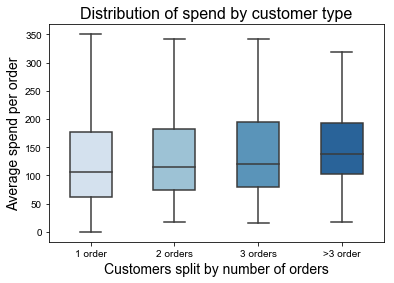

In [17]:
# truncating dataframe to only what we're going to use
# I do this quite frequently, it's not nessary, but helps communicate what I'm plotting
df = customer_sales_summary[['average_spend_per_order', 'num_order_category']]

# you can uncomment this to change the seaborn plot settings
#sb.set(rc={'figure.figsize':(10,5)})
#sb.despine()

# creating box plot
bplot = sb.boxplot(y='average_spend_per_order', x='num_order_category', 
                 data=df, 
                 width=0.5,
                 showfliers=False,
                palette="Blues")
# setting chart title, axis names, and changing styling
bplot.axes.set_title("Distribution of spend by customer type",fontsize=16)
bplot.set_xlabel("Customers split by number of orders", fontsize=14)
bplot.set_ylabel("Average spend per order",fontsize=14)
bplot.tick_params(labelsize=10)
sb.set_style("ticks")


## Differences in number of items and item category
<p>The next thing I'm going to look into is the differences in the number of items order</p>

In [18]:
# merging product category + product information (product info not in english)
product_info_category = product_info.merge(category_translated, how='left', on="product_category_name")
product_info_category.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure


In [19]:
# merging product info with order info per product
product_info_category_order = products_in_order.merge(product_info_category, how='left', on="product_id")
product_info_category_order = product_info_category_order.drop(['product_category_name', 'product_name_lenght','product_description_lenght',\
                                 'product_weight_g', 'product_length_cm','product_height_cm','product_width_cm'],  axis=1)
product_info_category_order.head(3)


,order_id,order_item_id,product_id,seller_id,price,freight_value,product_photos_qty,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,4.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.9,19.93,2.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.0,17.87,2.0,furniture_decor


In [21]:
# merging product category + product information (product info not in english)
# and removing un-necessary columns to keep it a bit more concise
all_order_with_customer_history = all_order_info.merge(customer_sales_summary, how='left', on="customer_unique_id")
all_order_with_customer_history = all_order_with_customer_history.drop(['order_purchase_timestamp',\
    'order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date', \
    'order_estimated_delivery_date', 'customer_zip_code_prefix', 'customer_city',\
    'customer_state', 'review_id', 'review_score', 'review_comment_title','review_comment_message', \
    'review_creation_date','review_answer_timestamp', 'order_status', 'payment_sequential', 'payment_type', \
    'payment_installments', 'payment_value'],  axis=1)
all_order_with_customer_history = all_order_with_customer_history.drop_duplicates()
all_order_with_customer_history.rename(columns={'total_order_value_x':'total_order_value'}, inplace=True)
all_order_with_customer_history.head(3)

,order_id,customer_id,customer_unique_id,total_order_value,order_purchase_timestamp_day,order_purchase_timestamp_month,first_purchase_month,total_spend,num_orders,num_order_category,average_spend_per_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,38.71,2017-10-02 10:56:33,Oct 2017,Oct 2017,82.82,2,2 orders,41.41
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,141.46,2018-07-24 20:41:37,Jul 2018,Jul 2018,141.46,1,1 order,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,179.12,2018-08-08 08:38:49,Aug 2018,Aug 2018,179.12,1,1 order,179.12


In [22]:
# merging order information with product information
all_order_info_with_item_customer_info = all_order_with_customer_history.merge(product_info_category_order,\
                                        how='left', on="order_id")
all_order_info_with_item_customer_info.head(3)

,order_id,customer_id,customer_unique_id,total_order_value,order_purchase_timestamp_day,order_purchase_timestamp_month,first_purchase_month,total_spend,num_orders,num_order_category,average_spend_per_order,order_item_id,product_id,seller_id,price,freight_value,product_photos_qty,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,38.71,2017-10-02 10:56:33,Oct 2017,Oct 2017,82.82,2,2 orders,41.41,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,4.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,141.46,2018-07-24 20:41:37,Jul 2018,Jul 2018,141.46,1,1 order,141.46,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,1.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,179.12,2018-08-08 08:38:49,Aug 2018,Aug 2018,179.12,1,1 order,179.12,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,1.0,auto


In [23]:
# calculating item total price because shipping is broken out as a seperate price
all_order_info_with_item_customer_info['item_total_price'] = \
    all_order_info_with_item_customer_info['price'] + all_order_info_with_item_customer_info['freight_value']

In [24]:
# creating a dataframe tosee how many items are in an order and what the average item price is
items_per_order = all_order_info_with_item_customer_info.groupby(['order_id', 'num_order_category', 'total_order_value']).\
    agg({'product_id':'count',  'item_total_price': 'mean'}).reset_index()
items_per_order.columns = ['order_id', 'num_order_category','total_order_value','num_items', 'avg_price']
items_per_order.head(3)

,order_id,num_order_category,total_order_value,num_items,avg_price
0,00010242fe8c5a6d1ba2dd792cb16214,1 order,72.19,1,72.19
1,00018f77f2f0320c557190d7a144bdd3,2 orders,259.83,1,259.83
2,000229ec398224ef6ca0657da4fc703e,1 order,216.87,1,216.87


In [25]:
# making a pivot to see how many customers fall withing each # of items bucket
items_per_order_aggr = items_per_order.groupby(['num_items']).\
    agg({'avg_price':'mean',  'total_order_value': 'mean', 'order_id':pd.Series.nunique}).reset_index()
items_per_order_aggr.columns = ['num_items', 'avg_price','mean_total_order_value','num_orders']

In [26]:
items_per_order_aggr.head()

,num_items,avg_price,mean_total_order_value,num_orders
0,0,NaN,210.092219,775
1,1,150.746033,151.391807,88863
2,2,106.153586,214.056618,7516
3,3,97.578565,294.298480,1322
4,4,97.915401,395.392455,505


In [27]:
items_per_order[items_per_order['num_items']==1]['avg_price'].describe()

count    88863.000000
mean       150.746033
std        205.162628
min          9.590000
25%         58.590000
50%         99.030000
75%        166.610000
max       6929.310000
Name: avg_price, dtype: float64

In [28]:
items_per_order[items_per_order['num_items']>1]['avg_price'].describe()

count    9803.000000
mean      104.082142
std       109.414075
min         9.341429
25%        49.350000
50%        76.020000
75%       121.945000
max      2404.720000
Name: avg_price, dtype: float64

In [29]:
# it looks like the average + median price of items is much higher for orders 
# that have 1 item vs >1 item
# I don't think I can use this to make a good reccomendation (because obviously we're always trying to sell
# as much as possible)

## What are our top selling categories?
<p> I looked into this data and found nothing super interesting here. However I think it is good to provide the execs a summary regarding best sellers, and understanding sales distribution for our top categories. Data here is used in the presentaiton</p>

In [30]:
# creating two pivots to see top cateogries by volume and by dollar amount
top_selling_volume = all_order_info_with_item_customer_info.groupby('product_category_name_english')\
    ['order_id'].count().reset_index()
top_selling_dollar = all_order_info_with_item_customer_info.groupby(['product_category_name_english', \
    'num_order_category'])['item_total_price'].sum().reset_index()


In [31]:
# creating a pivot within the pivot to examine. you can replace "top_selling_dollar" with "top_selling_volume"
# to create the other pivot
top_selling_dollar_pivot = pd.pivot_table(top_selling_dollar, \
                                          index= 'product_category_name_english', columns='num_order_category', \
                                          values="item_total_price")


In [32]:
# the commented out code belw is for me to view the entire dataframe without downloading
# but feel free to get the data out of Jupyter Notebook using any method!

#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)
top_selling_dollar_pivot.head()

num_order_category,1 order,2 orders,3 orders,>3 order
product_category_name_english,,,,
agro_industry_and_commerce,76907.00,1467.07,NaN,NaN
air_conditioning,57489.12,3926.03,257.92,101.12
art,27554.39,616.63,76.79,NaN
arts_and_craftmanship,1756.02,282.56,NaN,145.56
audio,54148.43,2081.58,31.75,137.18


# Customer satisfaction overall + per product cateogry

In [33]:
# creating dataframe to get the review information and dropping not relevant columns
all_order_info_with_item_customer_info_review = all_order_info_with_item_customer_info.merge(order_reviews, how='left', on="order_id")
all_order_info_with_item_customer_info_review = all_order_info_with_item_customer_info_review.\
    drop(['review_id', 'review_comment_title','review_comment_message','review_answer_timestamp'],  axis=1)
all_order_info_with_item_customer_info_review.head(3)

,order_id,customer_id,customer_unique_id,total_order_value,order_purchase_timestamp_day,order_purchase_timestamp_month,first_purchase_month,total_spend,num_orders,num_order_category,...,order_item_id,product_id,seller_id,price,freight_value,product_photos_qty,product_category_name_english,item_total_price,review_score,review_creation_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,38.71,2017-10-02 10:56:33,Oct 2017,Oct 2017,82.82,2,2 orders,...,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,4.0,housewares,38.71,4,2017-10-11 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,141.46,2018-07-24 20:41:37,Jul 2018,Jul 2018,141.46,1,1 order,...,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,1.0,perfumery,141.46,4,2018-08-08 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,179.12,2018-08-08 08:38:49,Aug 2018,Aug 2018,179.12,1,1 order,...,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,1.0,auto,179.12,5,2018-08-18 00:00:00


In [34]:
# creating a pviot to see review scores for customer's first purchase
# I'm only looking at first time purchases because we have a very low return rate 
# so I suspect there's a problem with customer satisfaction
review_by_month = all_order_info_with_item_customer_info_review.groupby(['first_purchase_month']).\
    agg({'review_score':['mean', 'median', 'count', np.std]}).reset_index()
review_by_month.head(3)

# and after seeing the data and plotting, customer satisfaction seems pretty constant

first_purchase_month review_score                       
                               mean median count       std
0             Apr 2017     3.992613      5  2843  1.392000
1             Apr 2018     4.067734      5  8371  1.354165
2             Aug 2017     4.183926      5  5263  1.277972

In [35]:
# making a pivot to see reviews per product cateogry
# not 100% correct but there's such a high volume of 1st time purchases that
# are only 1 item, I think it's safe to take a look at the data like thi
review_by_category = all_order_info_with_item_customer_info_review.groupby(['product_category_name_english']).\
    agg({'review_score':['mean', 'median', 'count', np.std], 'order_id': pd.Series.nunique}).reset_index()
review_by_category.head(3)

product_category_name_english review_score                        order_id
                                        mean median count       std  nunique
0    agro_industry_and_commerce     4.000000    5.0   212  1.363019      182
1              air_conditioning     3.919192    5.0   297  1.491032      253
2                           art     3.918660    5.0   209  1.463691      202

In [36]:
# getting the mean score
all_order_info_with_item_customer_info_review['review_score'].mean()

3.9998159509202456

In [37]:
# checking how many reviews are null
all_order_info_with_item_customer_info_review['order_id'].loc[\
    all_order_info_with_item_customer_info_review.review_score.notnull()].nunique()

99441